In [41]:
import pandas as pd
import numpy as np

In [42]:
# importing the dataset

dataset = pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [43]:
# separating the dependant and independant features

X_dataset = dataset.iloc[:, 3:13]
Y_dataset = dataset.iloc[:, 13]
X_dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [44]:
Y_dataset.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [45]:
# converting the categorical features into numerical feature

Geography = pd.get_dummies(X_dataset["Geography"], drop_first = True)
Gender = pd.get_dummies(X_dataset["Gender"], drop_first = True)

In [46]:
X_dataset = X_dataset.drop(["Geography", "Gender"], axis = 1)
X_dataset = pd.concat([X_dataset, Geography, Gender], axis = 1)

In [47]:
X_dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [48]:
# feature scaling

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(X_dataset)
X_dataset = pd.DataFrame(scalar.transform(X_dataset))

In [49]:
X_dataset.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,-0.578736,-0.573809,-1.095988
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.578736,1.742740,-1.095988
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,-0.578736,-0.573809,-1.095988
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.578736,-0.573809,-1.095988
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.578736,1.742740,-1.095988


In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_dataset, Y_dataset, test_size = 0.2, random_state = 0)

In [51]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(8000, 11) (2000, 11) (8000,) (2000,)


In [52]:
# importing the required for making an ANN model

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, ReLU, ELU
from keras.layers import Dropout

In [63]:
# making the ANN classifier 
ann_classifier = Sequential()

ann_classifier.add(Dense(units = 6, activation = "ReLU", input_dim = 11))
ann_classifier.add(Dense(units = 6,  activation = "ReLU"))
ann_classifier.add(Dense(units = 1,  activation = "sigmoid"))


In [66]:
ann_classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])


In [71]:
model_history = ann_classifier.fit(x_train, y_train, validation_split = 0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 12s 13ms/step - loss: 0.5258 - accuracy: 0.7567 - val_loss: 0.4606 - val_accuracy: 0.8035
Epoch 2/100
536/536 [==============================] - 5s 10ms/step - loss: 0.4396 - accuracy: 0.8065 - val_loss: 0.4385 - val_accuracy: 0.8114
Epoch 3/100
536/536 [==============================] - 7s 14ms/step - loss: 0.4264 - accuracy: 0.8145 - val_loss: 0.4303 - val_accuracy: 0.8164
Epoch 4/100
536/536 [==============================] - 5s 9ms/step - loss: 0.4174 - accuracy: 0.8225 - val_loss: 0.4175 - val_accuracy: 0.8209
Epoch 5/100
536/536 [==============================] - 5s 9ms/step - loss: 0.4033 - accuracy: 0.8343 - val_loss: 0.4038 - val_accuracy: 0.8338
Epoch 6/100
536/536 [==============================] - 5s 9ms/step - loss: 0.3883 - accuracy: 0.8438 - val_loss: 0.3925 - val_accuracy: 0.8421
Epoch 7/100
536/536 [==============================] - 5s 9ms/step - loss: 0.3758 - accuracy: 0.8466 - val_loss: 0.3820 - val_accuracy: 0.

In [73]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


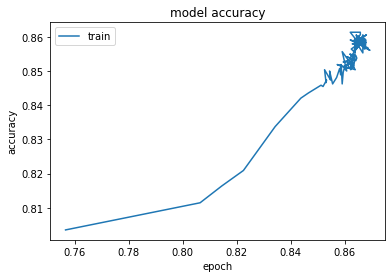

In [75]:
# summarizing the history of model
import matplotlib.pyplot as plt

plt.plot(model_history.history["accuracy"], model_history.history["val_accuracy"])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

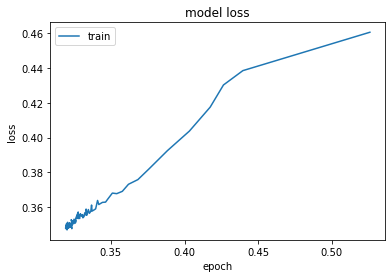

In [76]:
plt.plot(model_history.history["loss"], model_history.history["val_loss"])
plt.title("model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "test"], loc = "upper left")
plt.show()

In [77]:
# predicting the test set result

y_pred = ann_classifier.predict(x_test)
y_pred = (y_pred > 0.5)

# making the confusing matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)

# finding the accuracy 
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)

63/63 [==============================] - 3s 7ms/step


In [78]:
matrix

array([[1510,   85],
       [ 190,  215]], dtype=int64)

In [79]:
score

0.8625